In [3]:
from numpy import linspace, sin, cos, exp, pi, round
import numpy as np
import matplotlib.pyplot as plt
π = pi

In [2]:
# Set up some parameters
FREQ = 62.5 # Desired Frequency in Hz
OMEGA = ω = 2*π*FREQ
PHASE = 0
FS = 8000 # FS = 4096 = Analog-digital-converter sampling at this speed (128(MHz)
N = 8 # number of DFT points

In [3]:
t = linspace(0,1,FS) 

In [4]:
complexWave = exp(1j * ω * t + PHASE) # This is equivalent to [ cos(ωt)+ -1jSin(ωt) ]
cW = complexWave

In [5]:
# book walkthrough example for debugging. The wave and DFT equation will use this block instead of the 'complexWave variable'
FS = 8000 # FS
N = 8 # number of DFT points
t = linspace(0,1,FS-1) 
wave2 = sin(2*pi*1000*t)+0.5*sin(2*pi*2000*t + (3*pi/4))
wave2[0:8]

array([ 0.35355339,  0.3535534 ,  0.64672439,  1.0606598 ,  0.35221186,
       -1.0620479 , -1.35271847, -0.35160981])

**Lets make a plot!**

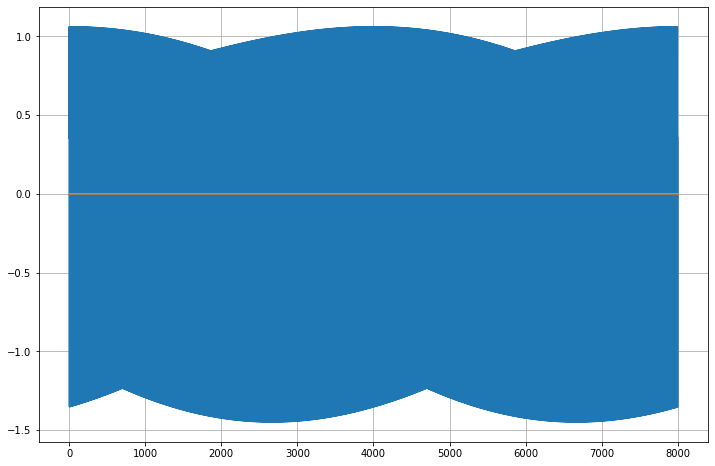

In [6]:
plt.figure(figsize=(12,8))
plt.plot(wave2.real)
plt.plot(wave2.imag)
# plt.xlim(-10,100)
plt.grid()
plt.show()

### Discrete Fourier Transform
_"Understanding Digital Signal Processing", RICHARD G LYONS: Chapter 3_


In [7]:
# My signal above has an FS of 
print("{} Hz".format(FS))

8000 Hz


In [8]:
# When I decide how many points my DFT will have or 'N'.
# This will result in the dft haveing fundamental frequency of FS/N
FF = FS/N
print("fanalysis is {0} Hz. the other x(m) frequencies will be integral multiples of {0}Hz such as {1}Hz, and {2}Hz".format(FF, FF*2, FF*3))

# it will divide my space up into 4 Hz Increments

fanalysis is 1000.0 Hz. the other x(m) frequencies will be integral multiples of 1000.0Hz such as 2000.0Hz, and 3000.0Hz


### DFT Equation
$ X(m) = \sum_{n=0}^{N-1}x(n)e^{-j2\pi nm/N} $ 

Which is equivalent to

$ X(m) = \sum_{n=0}^{N-1}x(n)[cos(2\pi nm / N) -1jsin(2\pi nm / N)]) $

From Euler's relationship

In [96]:
def dftEQ1(ts, N):
    """ This algo has been modified to print out all of it's calculations for debugging purposes. 
        
    """
    if N < 20:
        print("N DFT points < 20, logging calculations to file")
        file = open("discreteFourierTransform_eq1.txt", 'w')
        nPoints = N
        bigX = []
        for m in range(0, nPoints):
            x = 0
            for n in range(nPoints):
                x += ts[n] * exp(-1j*2*pi*n*m / nPoints)
                file.write("x({1}) * exp(-1j * 2 * π * {1} * {2} / {3}) ===> ".format(round(ts[n],4), n, m, nPoints))
                file.write("\t{0} * {1} \t = {2}\r\n".format(round(ts[n],3), round(exp(-1j*2*pi*n*m / nPoints),3), round(x,3)))
            bigX.append(x)
            xreal = round(x.real, 2)
            ximag = round(x.imag, 2)
            file.write("{0} ==> Magnitude = {1} ∠ {2}\r\n\r\n".format(round(x,3), round(np.sqrt(xreal**2 + ximag**2),2),
                                                                      round( (np.arctan(x.imag/x.real)*180) / pi, 1)))
        print("Analaysis Frequency = {} Hz".format(FS/nPoints))
        file.close()
        return np.array(bigX)
    else:
        nPoints = N
        bigX = []
        for m in range(1, nPoints):
            x = 0
            for n in range(nPoints):
                x += ts[n] * exp(-1j*2*pi*n*m / nPoints)
            bigX.append(x)
        print("Analaysis Frequency = {} Hz".format(FS/nPoints))
        return np.array(bigX)

def dftEQ2(ts, nPoints):
    bigX = []
    for m in range(nPoints):
        x = 0
        for n in range(nPoints):
            x = x + (ts[n]*cos((2*pi*n*m)/nPoints)) + (-1j*ts[n]*(sin((2*pi*n*m)/nPoints)))
        bigX.append(x)
    print("Analaysis Frequency = {} Hz or FS/N".format(FS/nPoints))
    return np.array(bigX)

In [90]:
result = dftEQ1(wave2, 8)

NameError: name 'wave2' is not defined

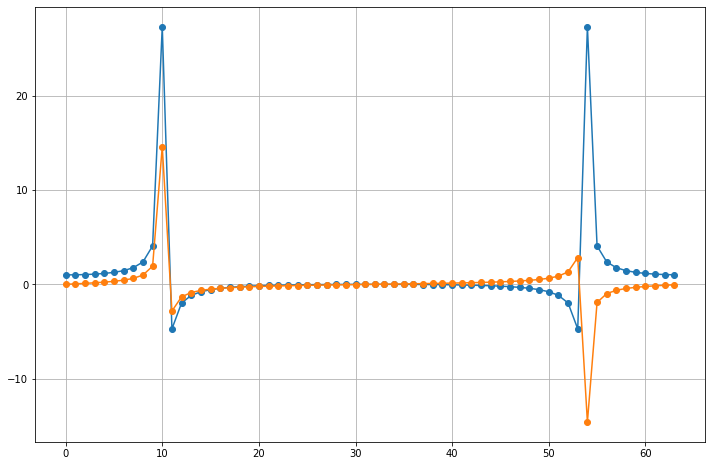

In [91]:
plt.figure(figsize=(12,8))
plt.plot(result.real, 'o-')
plt.plot(result.imag, 'o-')
# plt.xlim(0, FS/2)
# plt.xlim(490, 510)
plt.grid()
plt.show()

# DFT LEAKAGE

## SINC Functions

In [12]:
# sinc functions
x = linspace(-25, 25, 1000)
sincx = sin(x)/(x)
sincxNorm = sin(pi*x)/(pi*x)

### Plot of sinc functions

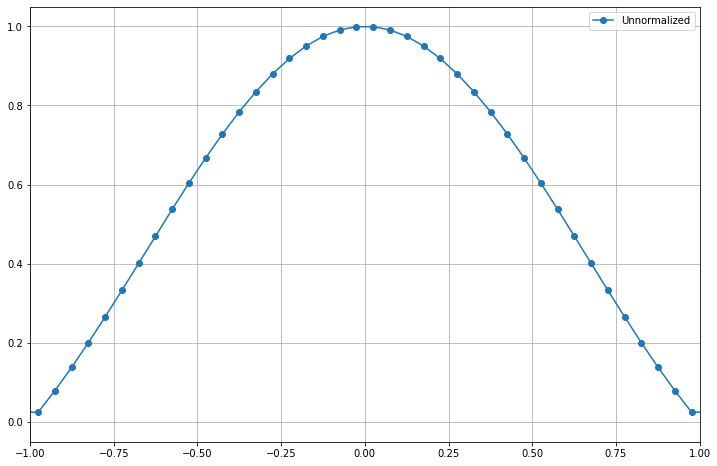

In [20]:
plt.figure(figsize=(12,8))
#plt.plot(x,abs(sincx), 'o-', )
plt.plot(x,abs(sincxNorm), 'o-')
plt.grid()
plt.xlim(-1, 1)
plt.legend(["Unnormalized", "Normalized"])
plt.show()

### Normalized Sinc Function

The normalized sinc function is the fourier transform of a square wave if I understand wikipedia correctly. Note: sinc functions will oscillate forever between [-inf, +inf]

## Simulations of DFT leakage

In [55]:
# create a wave

In [126]:
# Set up some parameters
FREQ = 5 # Desired Frequency in Hz
OMEGA = ω = 2*π*FREQ
PHASE = 0
FS = 64 # FS = 4096 = Analog-digital-converter sampling at this speed (128(MHz)
N = 64 # number of DFT points

In [127]:
t = linspace(0,1,FS) 

In [128]:
complexWave = exp(1j * ω * t + PHASE) # This is equivalent to [ cos(ωt)+ -1jSin(ωt) ]
cW = complexWave
wave = cW.real
FF = FS/N
print("fanalysis is {0} Hz. the other x(m) frequencies will be integral multiples of {0}Hz such as {1}Hz, and {2}Hz".format(FF, FF*2, FF*3))

fanalysis is 1.0 Hz. the other x(m) frequencies will be integral multiples of 1.0Hz such as 2.0Hz, and 3.0Hz


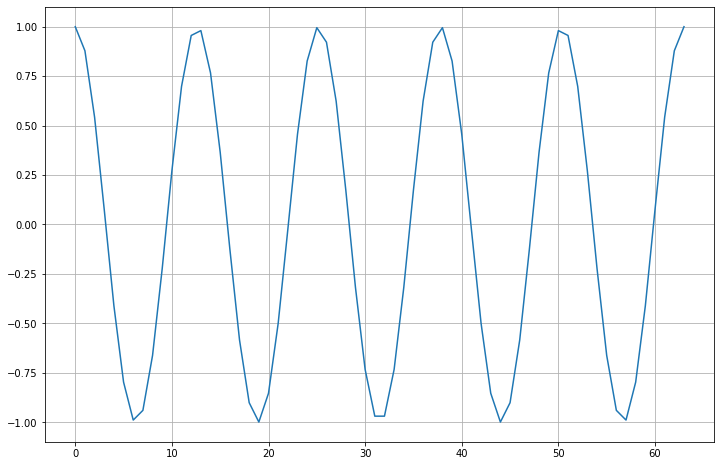

In [129]:
# PLOT THE WAVE CREATED
plt.figure(figsize=(12,8))
plt.plot(wave, "-")
plt.grid()
plt.show()

In [130]:
# PLOT THE WAVE AFTER FOURIER TRANSFORM

In [131]:
result = dftEQ1(wave, 64)

Analaysis Frequency = 1.0 Hz


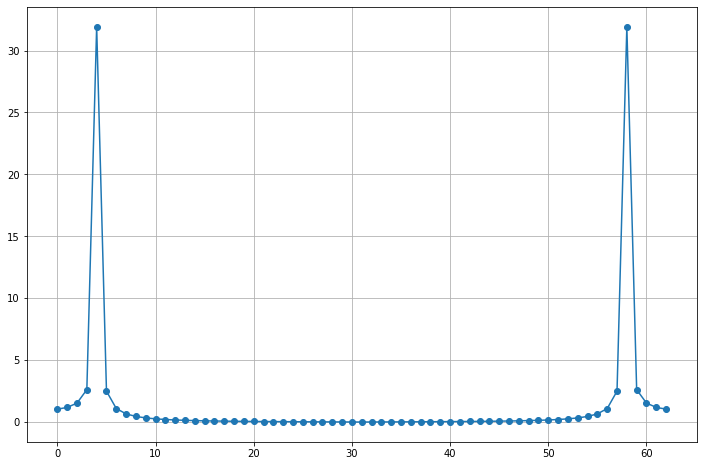

In [132]:
# PLOT THE WAVE CREATED
plt.figure(figsize=(12,8))
plt.plot(abs(result), "-o")
plt.grid()
plt.show()

In [114]:
wave

array([ 1.        ,  0.92147621,  0.69823682,  0.36534102, -0.02493069,
       -0.4112871 , -0.73305187, -0.93969262, -0.99875692, -0.90096887,
       -0.66168584, -0.31848665,  0.07473009,  0.45621066,  0.76604444,
        0.95557281,  0.99503078,  0.87822157,  0.6234898 ,  0.27084047,
       -0.1243437 , -0.5       , -0.79713251, -0.96907729, -0.98883083,
       -0.85329088, -0.58374367, -0.22252093,  0.17364818,  0.54254626,
        0.82623877,  0.98017249,  0.98017249,  0.82623877,  0.54254626,
        0.17364818, -0.22252093, -0.58374367, -0.85329088, -0.98883083,
       -0.96907729, -0.79713251, -0.5       , -0.1243437 ,  0.27084047,
        0.6234898 ,  0.87822157,  0.99503078,  0.95557281,  0.76604444,
        0.45621066,  0.07473009, -0.31848665, -0.66168584, -0.90096887,
       -0.99875692, -0.93969262, -0.73305187, -0.4112871 , -0.02493069,
        0.36534102,  0.69823682,  0.92147621,  1.        ])